In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam




In [ ]:
house_df = pd.read_csv('realtor_ma_only.csv')

In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175248 entries, 0 to 175247
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          175248 non-null  object 
 1   bed             149140 non-null  float64
 2   bath            149706 non-null  float64
 3   acre_lot        129090 non-null  float64
 4   city            175248 non-null  object 
 5   state           175248 non-null  object 
 6   zip_code        175234 non-null  float64
 7   house_size      150627 non-null  float64
 8   prev_sold_date  72298 non-null   object 
 9   price           175248 non-null  int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 13.4+ MB


In [ ]:
print(house_df['price'].mean())
print(house_df['price'].min())
print(house_df['bed'].max())
print(np.floor(house_df['bath'].mean()))
house_df.describe()


626253.4328361774
1
7.0
2.0


,bed,bath,acre_lot,zip_code,house_size,price
count,125581.000000,125581.000000,125581.000000,125581.000000,125581.000000,1.255810e+05
mean,2.927059,2.096519,0.339464,1922.096376,1656.668620,6.262534e+05
std,1.185280,0.844169,0.308314,476.600163,796.104008,3.802532e+05
min,1.000000,1.000000,0.000000,1001.000000,104.000000,1.000000e+00
25%,2.000000,2.000000,0.190000,1581.000000,1099.000000,3.500000e+05
50%,3.000000,2.000000,0.230000,2081.000000,1440.000000,5.650000e+05
75%,4.000000,3.000000,0.360000,2152.000000,2117.000000,8.150000e+05
max,7.000000,4.000000,1.530000,2893.000000,4453.000000,1.899000e+06


In [ ]:
house_df['bed'].fillna(house_df['bed'].mode()[0], inplace=True)
house_df['bath'].fillna(house_df['bath'].mode()[0], inplace=True)
house_df['acre_lot'].fillna(house_df['acre_lot'].mode()[0], inplace=True)
house_df['house_size'].fillna(house_df['house_size'].mode()[0], inplace=True)



<Axes: xlabel='house_size', ylabel='price'>

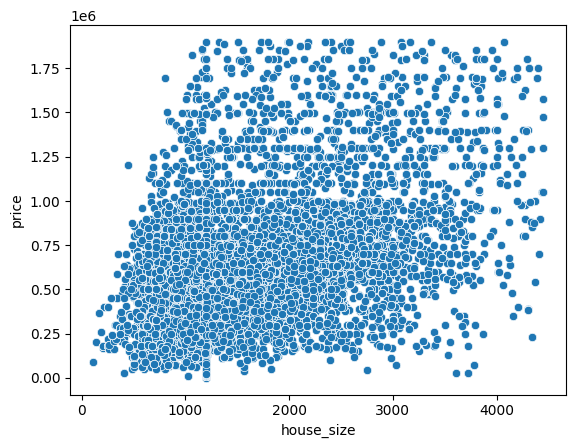

In [ ]:
sns.scatterplot(x = 'house_size', y = 'price', data = house_df)

In [ ]:
total_missing = house_df.isna().sum()*100/len(house_df)
print('Percentage Missing Value %')
total_missing.sort_values(ascending=False)

Percentage Missing Value %


prev_sold_date    58.745321
zip_code           0.007989
status             0.000000
bed                0.000000
bath               0.000000
acre_lot           0.000000
city               0.000000
state              0.000000
house_size         0.000000
price              0.000000
dtype: float64

In [ ]:
house_df = house_df.dropna(subset=['zip_code','city', 'price'])

In [ ]:
total_missing = house_df.isna().sum()
total_missing

status                 0
bed                    0
bath                   0
acre_lot               0
city                   0
state                  0
zip_code               0
house_size             0
prev_sold_date    102936
price                  0
dtype: int64

array([[<Axes: title={'center': 'bed'}>,
        <Axes: title={'center': 'bath'}>],
       [<Axes: title={'center': 'acre_lot'}>,
        <Axes: title={'center': 'zip_code'}>],
       [<Axes: title={'center': 'house_size'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

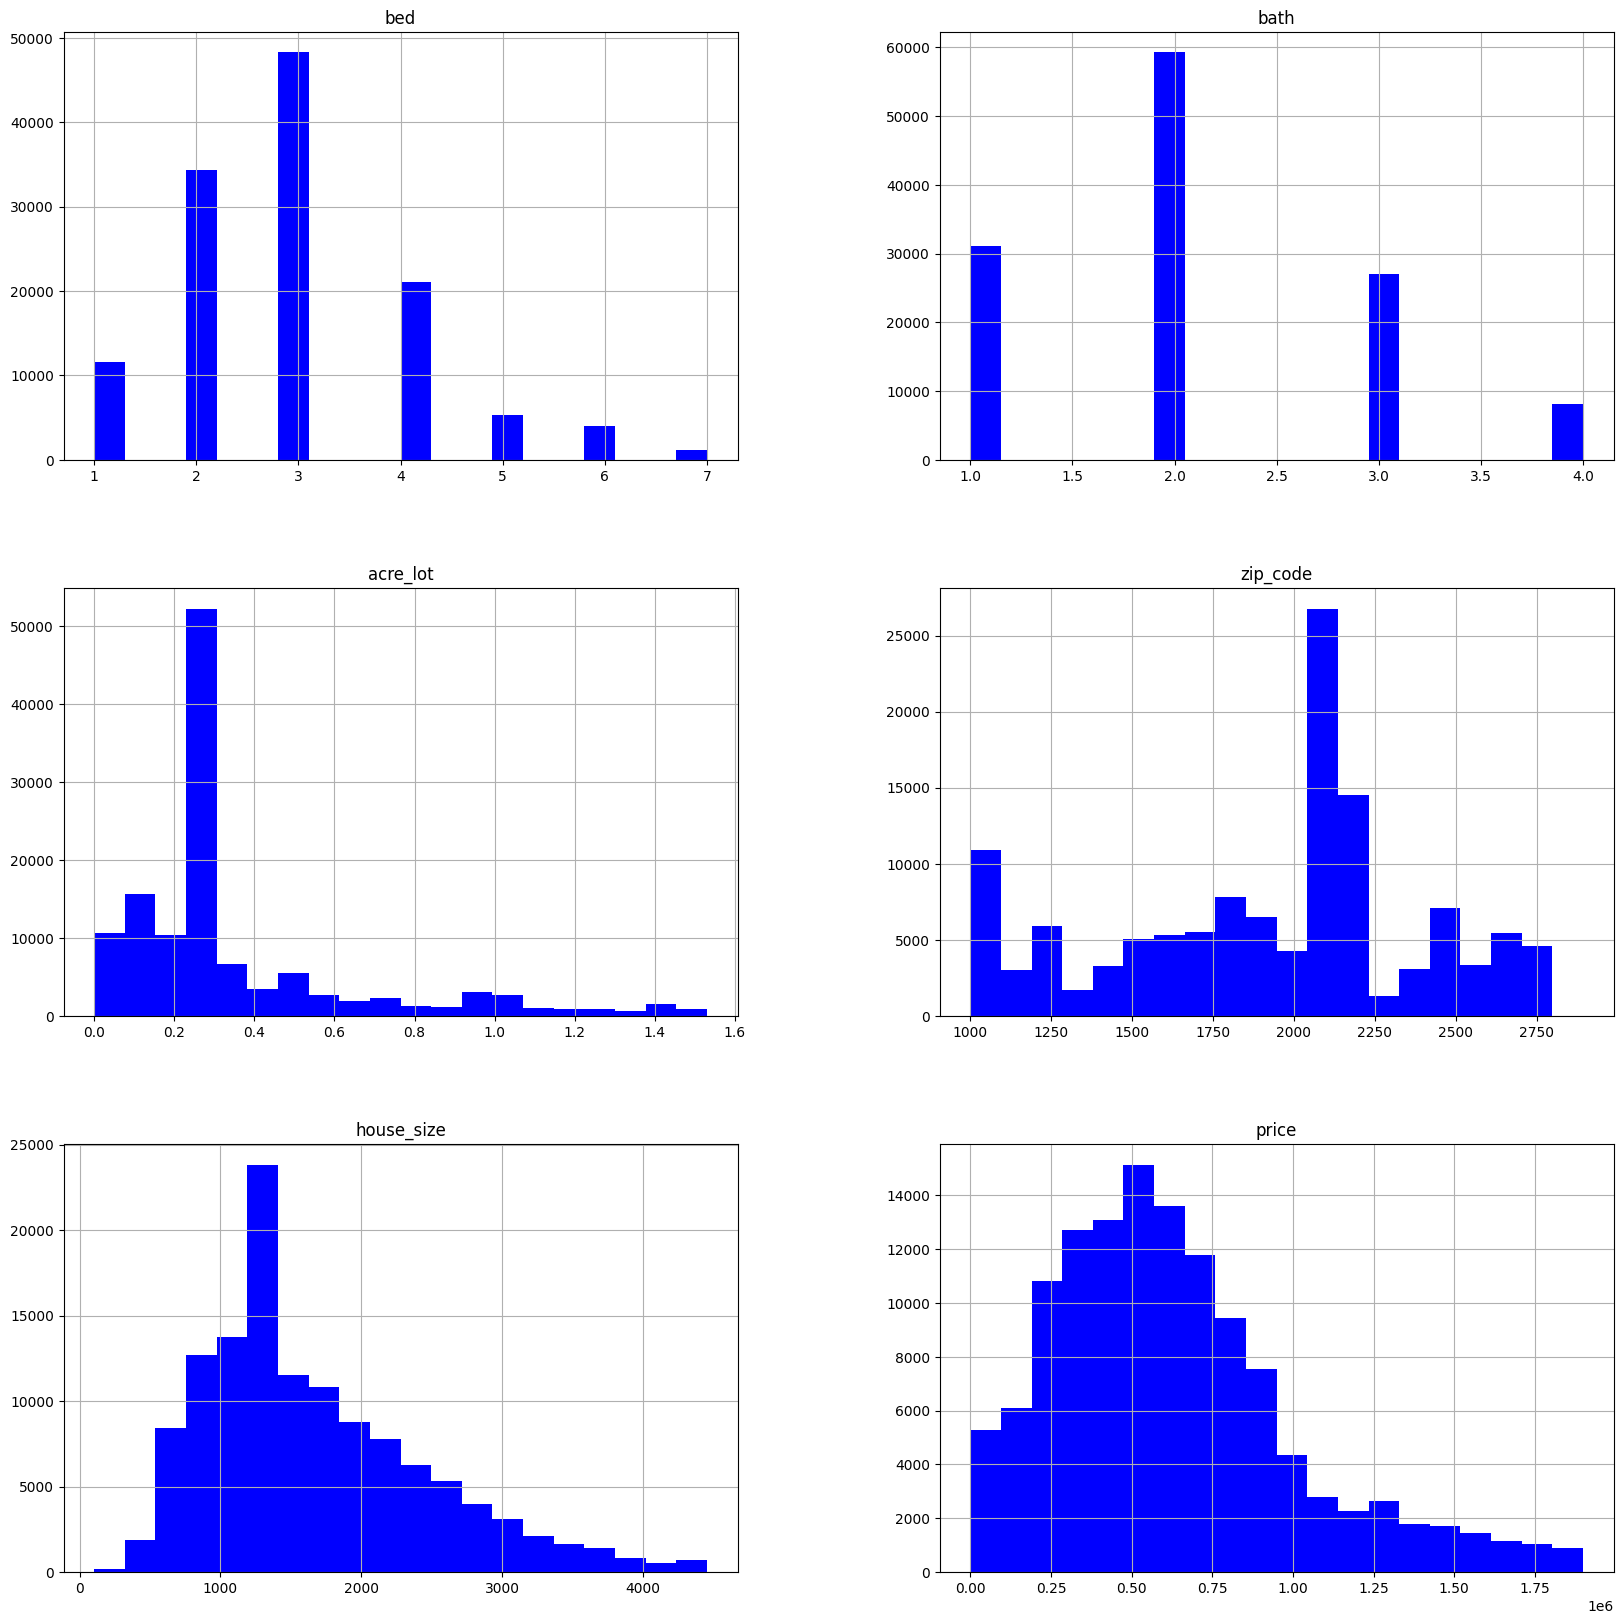

In [ ]:
house_df.hist(bins = 20, figsize = (20,20), color = 'b')

In [ ]:
cols = ['bed','bath','acre_lot','house_size','price']

In [ ]:
Q1 = house_df[cols].quantile(0.25)
Q3 = house_df[cols].quantile(0.75)
IQR = Q3 - Q1

house_df = house_df[~((house_df[cols] < (Q1 - 1.5 * IQR)) | (house_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
house_df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,2.0,1.0,0.34,Agawam,Massachusetts,1001.0,676.0,NaN,180000
2,for_sale,2.0,2.0,0.23,Agawam,Massachusetts,1001.0,892.0,4/30/2019,169900
3,for_sale,2.0,2.0,0.23,Agawam,Massachusetts,1001.0,1428.0,NaN,242000
4,for_sale,2.0,2.0,0.23,Agawam,Massachusetts,1001.0,1659.0,NaN,299950
5,for_sale,3.0,1.0,0.46,Agawam,Massachusetts,1001.0,1196.0,NaN,239900
...,...,...,...,...,...,...,...,...,...,...
175228,for_sale,2.0,2.0,0.37,Otis,Massachusetts,1253.0,1952.0,NaN,709000
175231,for_sale,4.0,1.0,0.13,Great Barrington,Massachusetts,1230.0,1554.0,10/31/1997,175000
175232,for_sale,2.0,1.0,0.06,Otis,Massachusetts,1253.0,800.0,NaN,159900
175236,for_sale,1.0,1.0,0.23,Otis,Massachusetts,1253.0,700.0,NaN,79900


<ipython-input-57-cca5abf2f039>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(house_df.corr(), annot = True)


<Axes: >

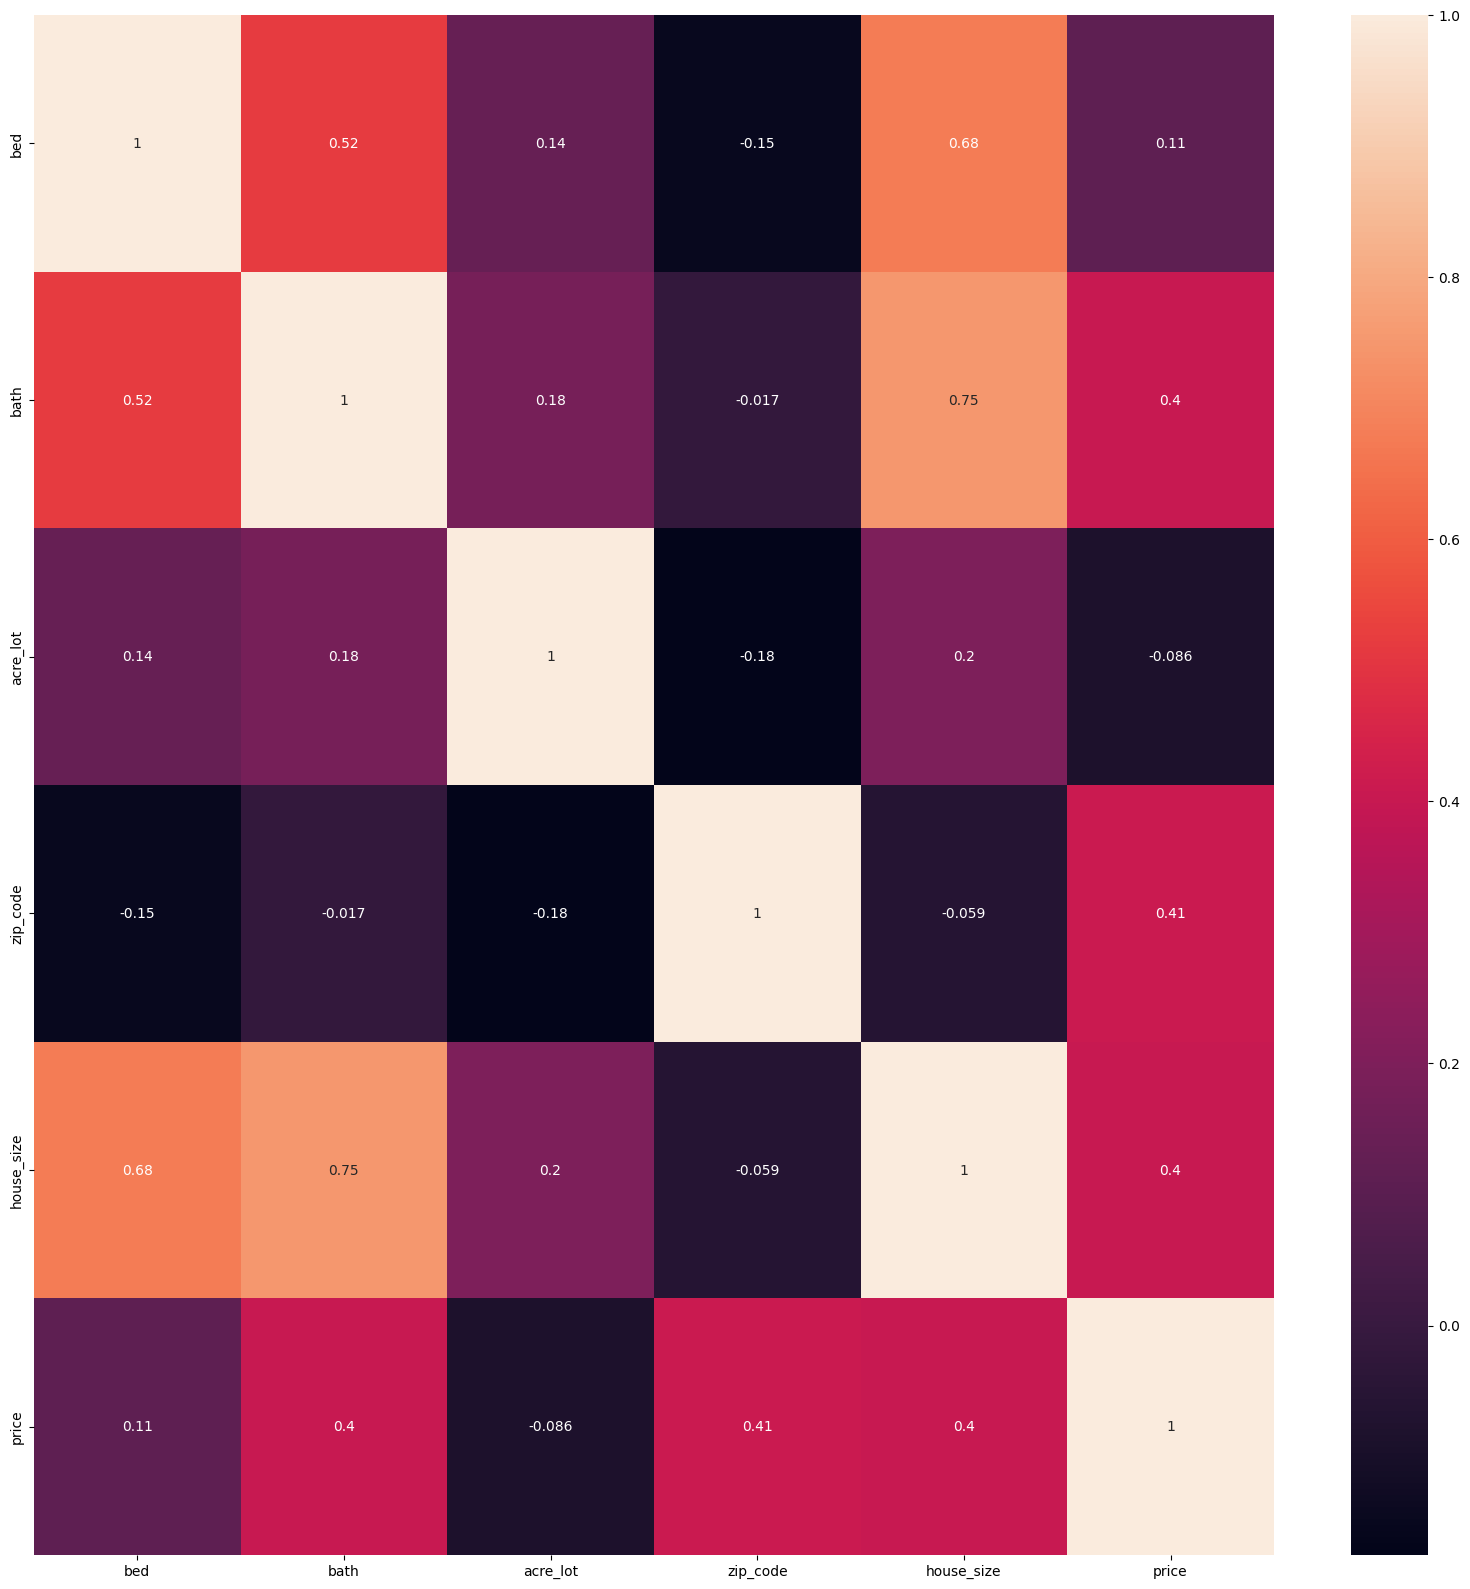

In [ ]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(house_df.corr(), annot = True)

In [ ]:
selected_features = ['bed', 'bath', 'acre_lot','zip_code', 'house_size']

In [ ]:
X = house_df[selected_features]

In [ ]:
X

,bed,bath,acre_lot,zip_code,house_size
0,2.0,1.0,0.34,1001.0,676.0
2,2.0,2.0,0.23,1001.0,892.0
3,2.0,2.0,0.23,1001.0,1428.0
4,2.0,2.0,0.23,1001.0,1659.0
5,3.0,1.0,0.46,1001.0,1196.0
...,...,...,...,...,...
175228,2.0,2.0,0.37,1253.0,1952.0
175231,4.0,1.0,0.13,1230.0,1554.0
175232,2.0,1.0,0.06,1253.0,800.0
175236,1.0,1.0,0.23,1253.0,700.0


In [ ]:
y = house_df['price']

In [ ]:
y

0         180000
2         169900
3         242000
4         299950
5         239900
           ...  
175228    709000
175231    175000
175232    159900
175236     79900
175241     80000
Name: price, Length: 125581, dtype: int64

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_scaled

array([[0.16666667, 0.        , 0.22222222, 0.        , 0.13152449],
       [0.16666667, 0.33333333, 0.1503268 , 0.        , 0.18119108],
       [0.16666667, 0.33333333, 0.1503268 , 0.        , 0.3044378 ],
       ...,
       [0.16666667, 0.        , 0.03921569, 0.13319239, 0.16003679],
       [0.        , 0.        , 0.1503268 , 0.13319239, 0.137043  ],
       [0.33333333, 0.33333333, 0.2745098 , 0.13636364, 0.25201196]])

In [ ]:
X_scaled.shape

(125581, 5)

In [ ]:
scaler.data_max_

array([7.000e+00, 4.000e+00, 1.530e+00, 2.893e+03, 4.453e+03])

In [ ]:
scaler.data_min_

array([1.000e+00, 1.000e+00, 0.000e+00, 1.001e+03, 1.040e+02])

In [ ]:
y = y.values.reshape(-1,1)

In [ ]:
y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y)

In [ ]:
y_scaled

array([[0.09478625],
       [0.08946766],
       [0.12743503],
       ...,
       [0.08420173],
       [0.04207427],
       [0.04212693]])

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  if epoch < 50:
    return lr
  else:
    return lr * tf.math.exp(-0.1)
lr_schedule = LearningRateScheduler(scheduler)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [ ]:
X_train.shape

(94185, 5)

In [ ]:
X_test.shape

(31396, 5)

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_dim = 5, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               600       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 200)               20200     
                                                                 
 dense_4 (Dense)             (None, 200)               40200     
                                                                 
 dense_5 (Dense)             (None, 1)                 201       
                                                                 
Total params: 81401 (317.97 KB)
Trainable params: 81401 

In [ ]:
#model.compile(optimizer = 'Adam', loss = 'mean_squared_error')
optimizer = tensorflow.keras.optimizers.Adam(clipvalue=0.5)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2, callbacks=[lr_schedule])



Epoch 1/100
1507/1507 [==============================] - 9s 4ms/step - loss: 0.0195 - val_loss: 0.0184 - lr: 0.0010
Epoch 2/100
1507/1507 [==============================] - 7s 4ms/step - loss: 0.0167 - val_loss: 0.0155 - lr: 0.0010
Epoch 3/100
1507/1507 [==============================] - 5s 4ms/step - loss: 0.0153 - val_loss: 0.0141 - lr: 0.0010
Epoch 4/100
1507/1507 [==============================] - 6s 4ms/step - loss: 0.0142 - val_loss: 0.0140 - lr: 0.0010
Epoch 5/100
1507/1507 [==============================] - 6s 4ms/step - loss: 0.0136 - val_loss: 0.0130 - lr: 0.0010
Epoch 6/100
1507/1507 [==============================] - 5s 4ms/step - loss: 0.0128 - val_loss: 0.0133 - lr: 0.0010
Epoch 7/100
1507/1507 [==============================] - 7s 4ms/step - loss: 0.0124 - val_loss: 0.0111 - lr: 0.0010
Epoch 8/100
1507/1507 [==============================] - 6s 4ms/step - loss: 0.0119 - val_loss: 0.0125 - lr: 0.0010
Epoch 9/100
1507/1507 [==============================] - 7s 4ms/step - l

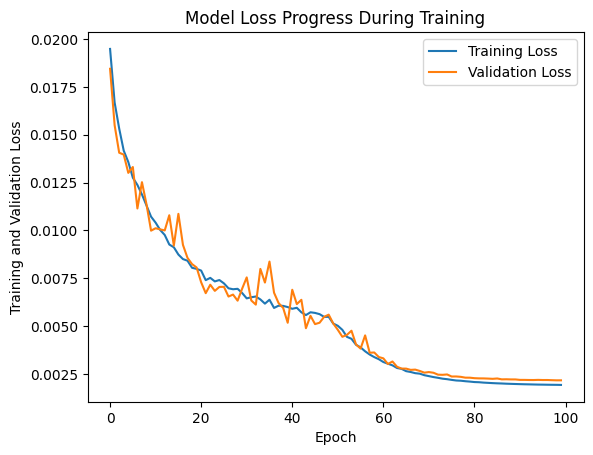

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

In [ ]:
# 'bed', 'bath', 'acre_lot','zip_code', 'house_size',
X_test_1 = np.array([[ 4, 3,.63, 2655,2624]])
X_test_scaled_1 = scaler.transform(X_test_1)
X_test_scaled_1


In [ ]:
y_predict_1 = model.predict(X_test_scaled_1)
y_predict_1
y_predict_1 = y_scaler.inverse_transform(y_predict_1)
y_predict_1


1/1 [==============================] - 0s 21ms/step


array([[839490.5]], dtype=float32)

982/982 [==============================] - 1s 1ms/step


Text(0, 0.5, 'True Values')

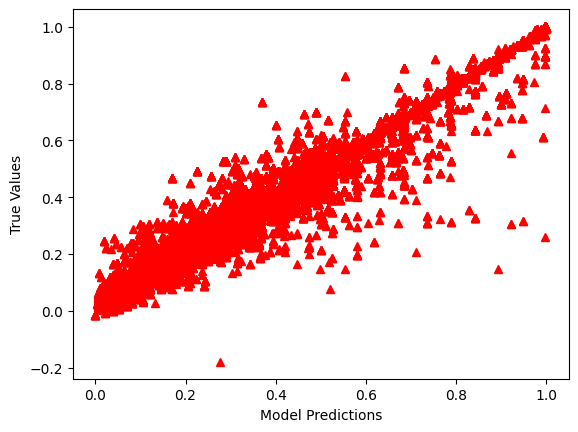

In [ ]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [ ]:
y_predict_orig = y_scaler.inverse_transform(y_predict)
y_test_orig = y_scaler.inverse_transform(y_test)


In [ ]:
k = X_test.shape[1]
n = len(X_test)
n

31396

In [ ]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)


RMSE = 89007.439 
MSE = 7922324235.318464 
MAE = 42253.78487972941 
R2 = 0.9455342138231086 
Adjusted R2 = 0.945525538164272
